In [1]:
!pip install torch

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import glob
import os
import random
from tqdm import tqdm
import cv2 as cv
import PIL
from PIL import Image
!pip install plotly
import plotly.express as px
from IPython import display

import tensorflow as tf
from tensorflow import keras

import torch
from torchvision import datasets
from torchvision import transforms
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [3]:
import sqlite3
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.special import zeta

In [4]:
%matplotlib inline
import glob
import random
from tqdm import tqdm
import cv2 as cv
import PIL
from PIL import Image
!pip install plotly
import plotly.express as px
from IPython import display
from tensorflow import keras

In [5]:
import torch
#from torchvision import datasets
#from torchvision import transforms
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [6]:
!git clone https://github.com/koundinyaburgula/finalproject.git

Cloning into 'finalproject'...
remote: Enumerating objects: 8, done.
remote: Counting objects: 100% (8/8), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 8 (delta 1), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (8/8), done.


In [7]:
df = pd.read_csv('/content/finalproject/nft_sales.csv')
df.head()

,Collections,Sales,Buyers,Txns,Owners
0,Axie Infinity,"$3,328,148,500","10,79,811","97,55,511","26,56,431"
1,CryptoPunks,"$1,664,246,968","4,723","18,961","3,289"
2,Art Blocks,"$1,075,223,906","20,934","1,17,602","25,094"
3,Bored Ape Yacht Club,"$783,882,186","8,284","22,584","5,862"
4,NBA Top Shot,"$781,965,423","3,74,818","1,17,90,699","6,03,928"


In [8]:
df.describe()

,Collections,Sales,Buyers,Txns,Owners
count,250,250,250,250,244
unique,250,250,246,249,235
top,Axie Infinity,"$3,328,148,500","3,246","4,523",1
freq,1,1,2,2,5


In [9]:
df.rename(columns = {'Sales':'Sales in USD','Txns':'Transactions'}, inplace = True)
df['Sales in USD'] = df['Sales in USD'].str.replace(',', '')
df['Sales in USD'] = df['Sales in USD'].str.replace('$', '')
df['Buyers'] = df['Buyers'].str.replace(',','')
df['Transactions'] = df['Transactions'].str.replace(',','')
df['Owners'] = df['Owners'].str.replace(',','')
df=df.dropna()
df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  This is separate from the ipykernel package so we can avoid doing imports until


,Collections,Sales in USD,Buyers,Transactions,Owners
0,Axie Infinity,3328148500,1079811,9755511,2656431
1,CryptoPunks,1664246968,4723,18961,3289
2,Art Blocks,1075223906,20934,117602,25094
3,Bored Ape Yacht Club,783882186,8284,22584,5862
4,NBA Top Shot,781965423,374818,11790699,603928
...,...,...,...,...,...
245,Evolution,2536468,746,4961,2061
246,LegionPunks,2535490,1702,3794,2410
247,BabyApes,2521714,1671,3405,2785
248,Train of the Century,2504080,3139,39460,3160


In [10]:
df['Sales in USD'] = df['Sales in USD'].astype('int64')
df['Buyers'] = df['Buyers'].astype('int64')
df['Transactions'] = df['Transactions'].astype('int64')
df['Owners'] = df['Owners'].astype('int32')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [11]:
df['100 million club'] = np.where(df['Sales in USD']>=100000000, 'Yes', 'No')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [12]:
# Sales of NFT's which are under 'Punks Collection'
punks_collection = df[df['Collections'].str.contains('Punks')]

sum_sales = punks_collection['Sales in USD'].sum()
print(f"Total Sales of 'Punks' Collection is {sum_sales:,}$")
punks_collection

Total Sales of 'Punks' Collection is 1,764,170,511$


,Collections,Sales in USD,Buyers,Transactions,Owners,100 million club
1,CryptoPunks,1664246968,4723,18961,3289,Yes
66,SolPunks,32952969,5926,14399,4414,No
86,Bastard Gan Punks V2,20062405,3246,10387,2893,No
88,Space Punks Club,19780599,5556,12197,4557,No
90,DystoPunks V2,19165801,1207,2876,672,No
173,COVIDPunks,5426279,4338,9981,3841,No
246,LegionPunks,2535490,1702,3794,2410,No


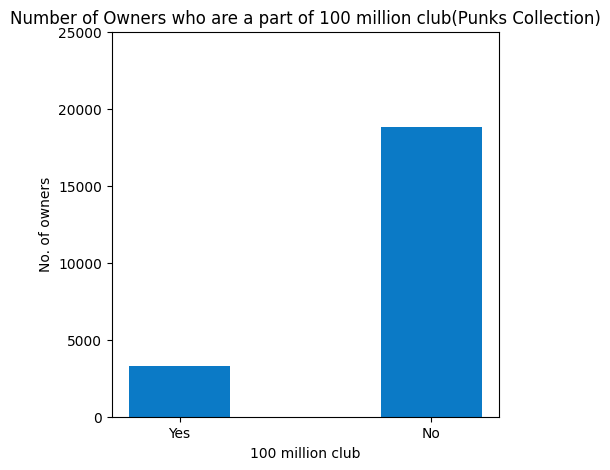

In [13]:
df2 = punks_collection.groupby('100 million club').sum()
owners = [df2['Owners'][1],df2['Owners'][0]]
con = ['Yes','No']
plt.style.use('default')
plt.figure(figsize=(5,5))
p = plt.bar(con,owners,width=0.40,color='#0B7AC6')
plt.ylim(0,25000)
plt.title("Number of Owners who are a part of 100 million club(Punks Collection)")
#plt.bar_label(p)
plt.xlabel('100 million club')
plt.ylabel('No. of owners')
plt.show()

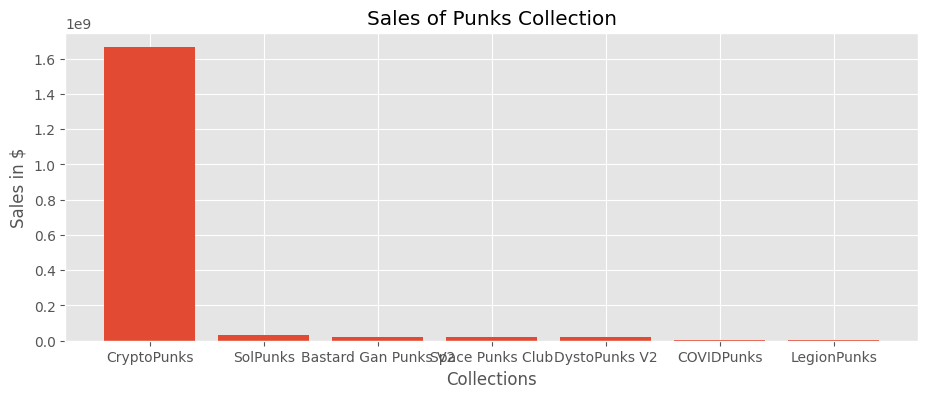

In [14]:
collection = punks_collection['Collections']
sales = punks_collection['Sales in USD']
plt.style.use('ggplot')
plt.figure(figsize=(11,4))
plt.bar(collection,sales)
plt.title('Sales of Punks Collection')
plt.xlabel('Collections')
plt.ylabel('Sales in $')
plt.show()

In [15]:
df_100 = df.loc[df['100 million club'] == 'Yes']
average_sales_100 =round(df_100['Sales in USD'].mean())
df_no100 = df.loc[df['100 million club'] == 'No']
average_sales_no100 = round(df_no100['Sales in USD'].mean())
print(f'Average sales of 100 million club is {average_sales_100:,}$')

Average sales of 100 million club is 457,926,711$


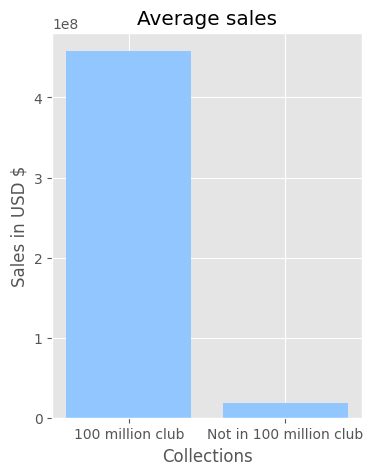

In [16]:
x= ['100 million club','Not in 100 million club']
avg = [average_sales_100,average_sales_no100]

plt.style.use('seaborn-pastel')
plt.figure(figsize=(4,5))

plt.bar(x,avg)
plt.title('Average sales')
plt.xlabel('Collections')
plt.ylabel('Sales in USD $')
plt.show()

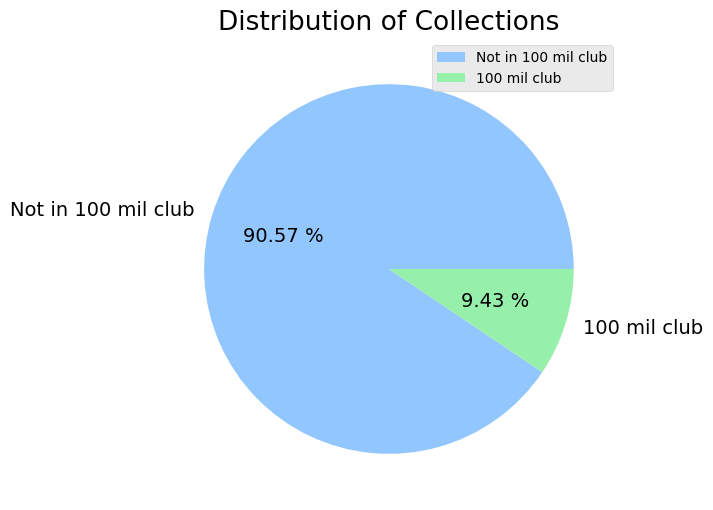

In [17]:
count = df.groupby(['100 million club']).count()['Collections']
labels = ["Not in 100 mil club","100 mil club"]
plt.style.use('seaborn-pastel')
plt.figure(figsize=(6,6))
plt.pie(count,labels=labels,autopct='%.2f %%',textprops={'fontsize': 14})
plt.title("Distribution of Collections",fontdict={'fontsize': 19})
plt.legend(fontsize=10)
plt.show()

In [18]:
maximum_sale = df['Sales in USD'].max()
collection = df[df['Sales in USD'] == maximum_sale ]['Collections'][0]

print(f'The NFT Collection having maxiumum sales is {collection}')
print(f'Total sales of {collection} are {maximum_sale:,} USD')

The NFT Collection having maxiumum sales is Axie Infinity
Total sales of Axie Infinity are 3,328,148,500 USD


In [19]:
most_transaction  = df['Transactions'].max()
most_data = df[df['Transactions']==most_transaction]
collection_of_most = most_data['Collections'].iloc[0]
sales_of_most = most_data['Sales in USD'].iloc[0]

lower_transact = df.iloc[1][3]
collection_of_lower = df.iloc[1][0]
sales_of_lower = df.iloc[1][1]

print(f'{collection_of_most} has {most_transaction} transactions (Highest amongst all)')
print(f'{collection_of_lower} has {lower_transact} transactions (Relatively lower transaction)')

NBA Top Shot has 11790699 transactions (Highest amongst all)
CryptoPunks has 18961 transactions (Relatively lower transaction)


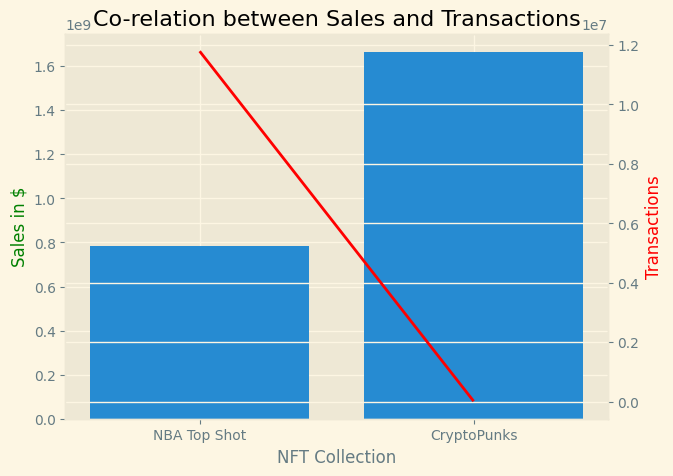

In [20]:
collections = [collection_of_most,collection_of_lower]
sales = [sales_of_most,sales_of_lower]
transactions = [most_transaction,lower_transact]

plt.style.use('Solarize_Light2')
fig,ax1 = plt.subplots(figsize=(7,5))
ax2=ax1.twinx()
p = ax1.bar(collections,sales)
ax2.plot(collections,transactions,'r-')
plt.title('Co-relation between Sales and Transactions')
ax1.set_xlabel('NFT Collection')
ax1.set_ylabel('Sales in $',color='g')
ax2.set_ylabel('Transactions',color='r')
plt.show()

In [21]:
!unzip /content/finalproject/archive.zip

Streaming output truncated to the last 5000 lines.
  inflating: imgs/imgs/550.png       
  inflating: imgs/imgs/5500.png      
  inflating: imgs/imgs/5501.png      
  inflating: imgs/imgs/5502.png      
  inflating: imgs/imgs/5503.png      
  inflating: imgs/imgs/5504.png      
  inflating: imgs/imgs/5505.png      
  inflating: imgs/imgs/5506.png      
  inflating: imgs/imgs/5507.png      
  inflating: imgs/imgs/5508.png      
  inflating: imgs/imgs/5509.png      
  inflating: imgs/imgs/551.png       
  inflating: imgs/imgs/5510.png      
  inflating: imgs/imgs/5511.png      
  inflating: imgs/imgs/5512.png      
  inflating: imgs/imgs/5513.png      
  inflating: imgs/imgs/5514.png      
  inflating: imgs/imgs/5515.png      
  inflating: imgs/imgs/5516.png      
  inflating: imgs/imgs/5517.png      
  inflating: imgs/imgs/5518.png      
  inflating: imgs/imgs/5519.png      
  inflating: imgs/imgs/552.png       
  inflating: imgs/imgs/5520.png      
  inflating: imgs/imgs/5521.png      

In [22]:
data_dir = '/content/txn_history-2021-10-07.jsonl'
image_dir = "/content/imgs/imgs"
image_root = "/content/imgs"

In [23]:
df = pd.read_json('/content/txn_history-2021-10-07.jsonl', lines=True)
df.head()

,txn_type,from,to,date,timestamp,source,eth,punk_id,from_wallet_address,to_wallet_address,type,accessories
0,Bid Withdrawn,0xe73a1d,,2021-09-04,2021-09-04,larvalabs,321.0,0,None,None,[Female],"[Green Eye Shadow, Earring, Blonde Bob]"
1,Bid,0xe73a1d,,2021-09-01,2021-09-01,larvalabs,321.0,0,None,None,[Female],"[Green Eye Shadow, Earring, Blonde Bob]"
2,Bid Withdrawn,0x2e5e22,,2021-09-01,2021-09-01,larvalabs,320.0,0,None,None,[Female],"[Green Eye Shadow, Earring, Blonde Bob]"
3,Bid,0x2e5e22,,2021-09-01,2021-09-01,larvalabs,320.0,0,None,None,[Female],"[Green Eye Shadow, Earring, Blonde Bob]"
4,Bid Withdrawn,0x2e5e22,,2021-09-01,2021-09-01,larvalabs,263.0,0,None,None,[Female],"[Green Eye Shadow, Earring, Blonde Bob]"


Sample 100 CryptoPunks


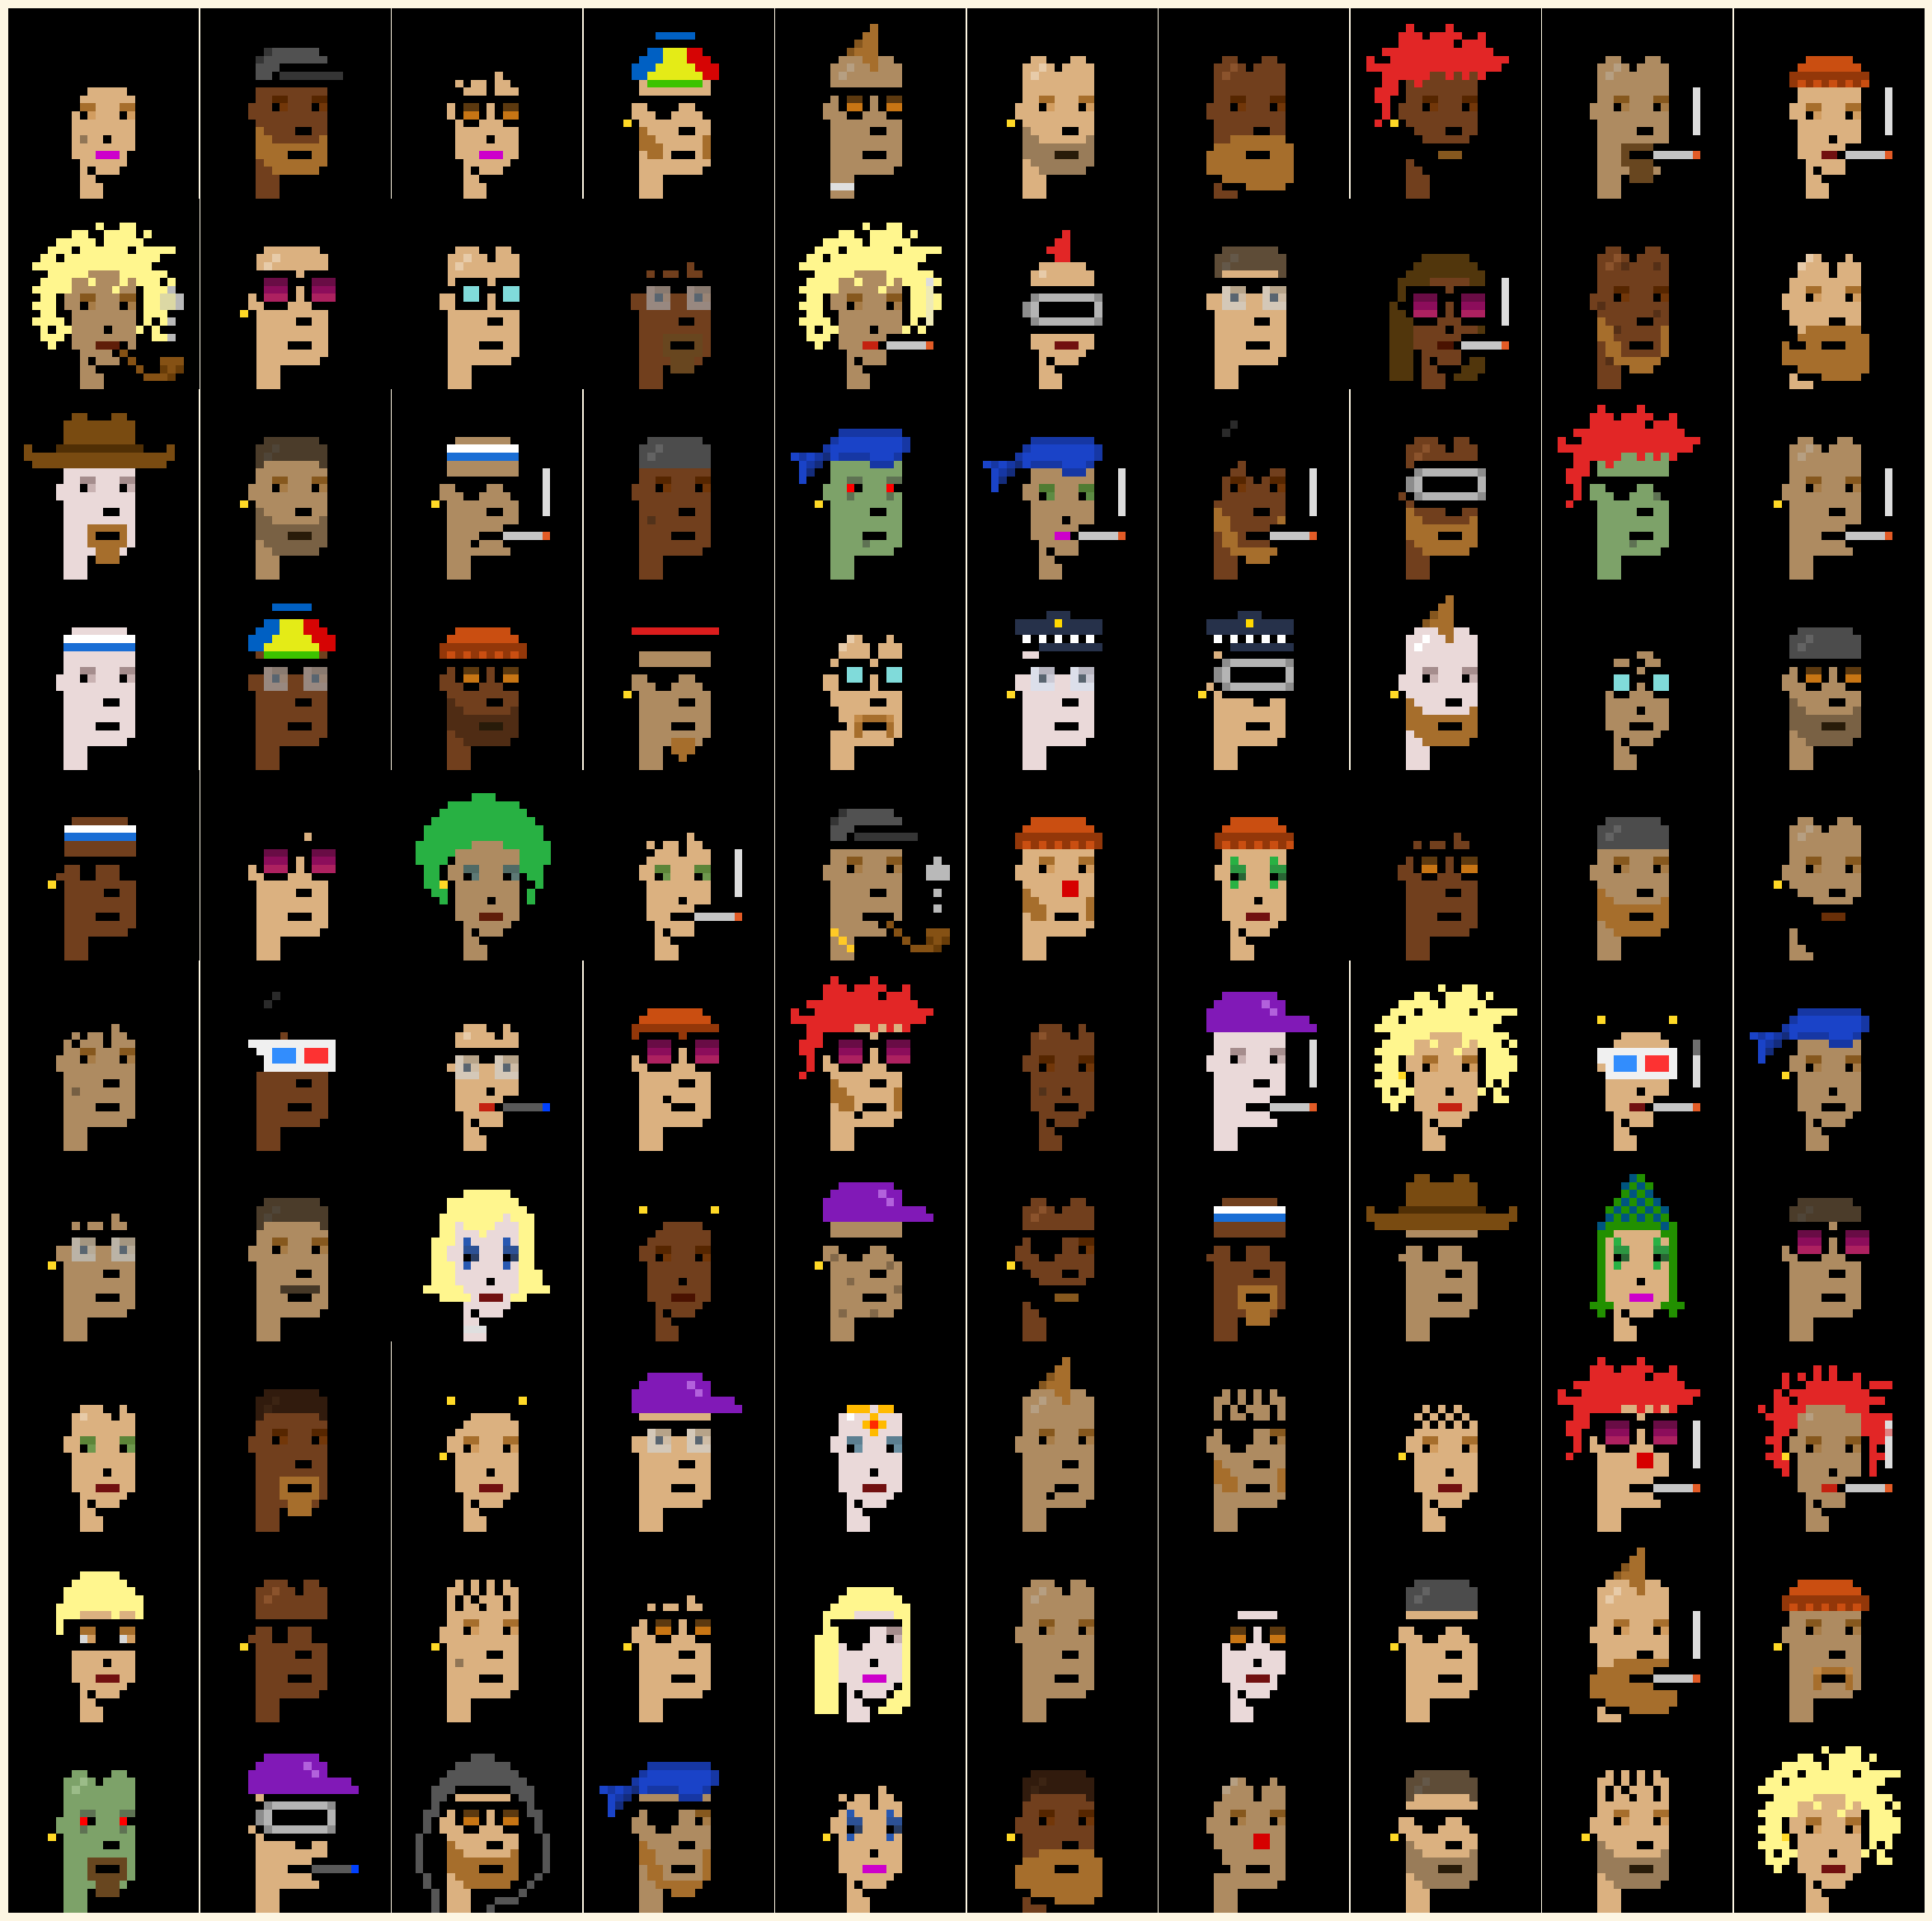

In [24]:
#look at 100 samples

#define number of rows and cols
no_plots = 10*10

#define path
images = glob.glob("/content/imgs/imgs/*.png")

plt.rcParams['figure.figsize'] = (30, 30)
plt.subplots_adjust(wspace=0, hspace=0)

print("Sample 100 CryptoPunks")
for idx,image in enumerate(images[:no_plots]):
    sample_img = cv.imread(image)
    plt.subplot(10, 10, idx+1)
    plt.axis('off')
    plt.imshow(cv.cvtColor(sample_img,cv.COLOR_BGR2RGB)) #covert color space
plt.show()

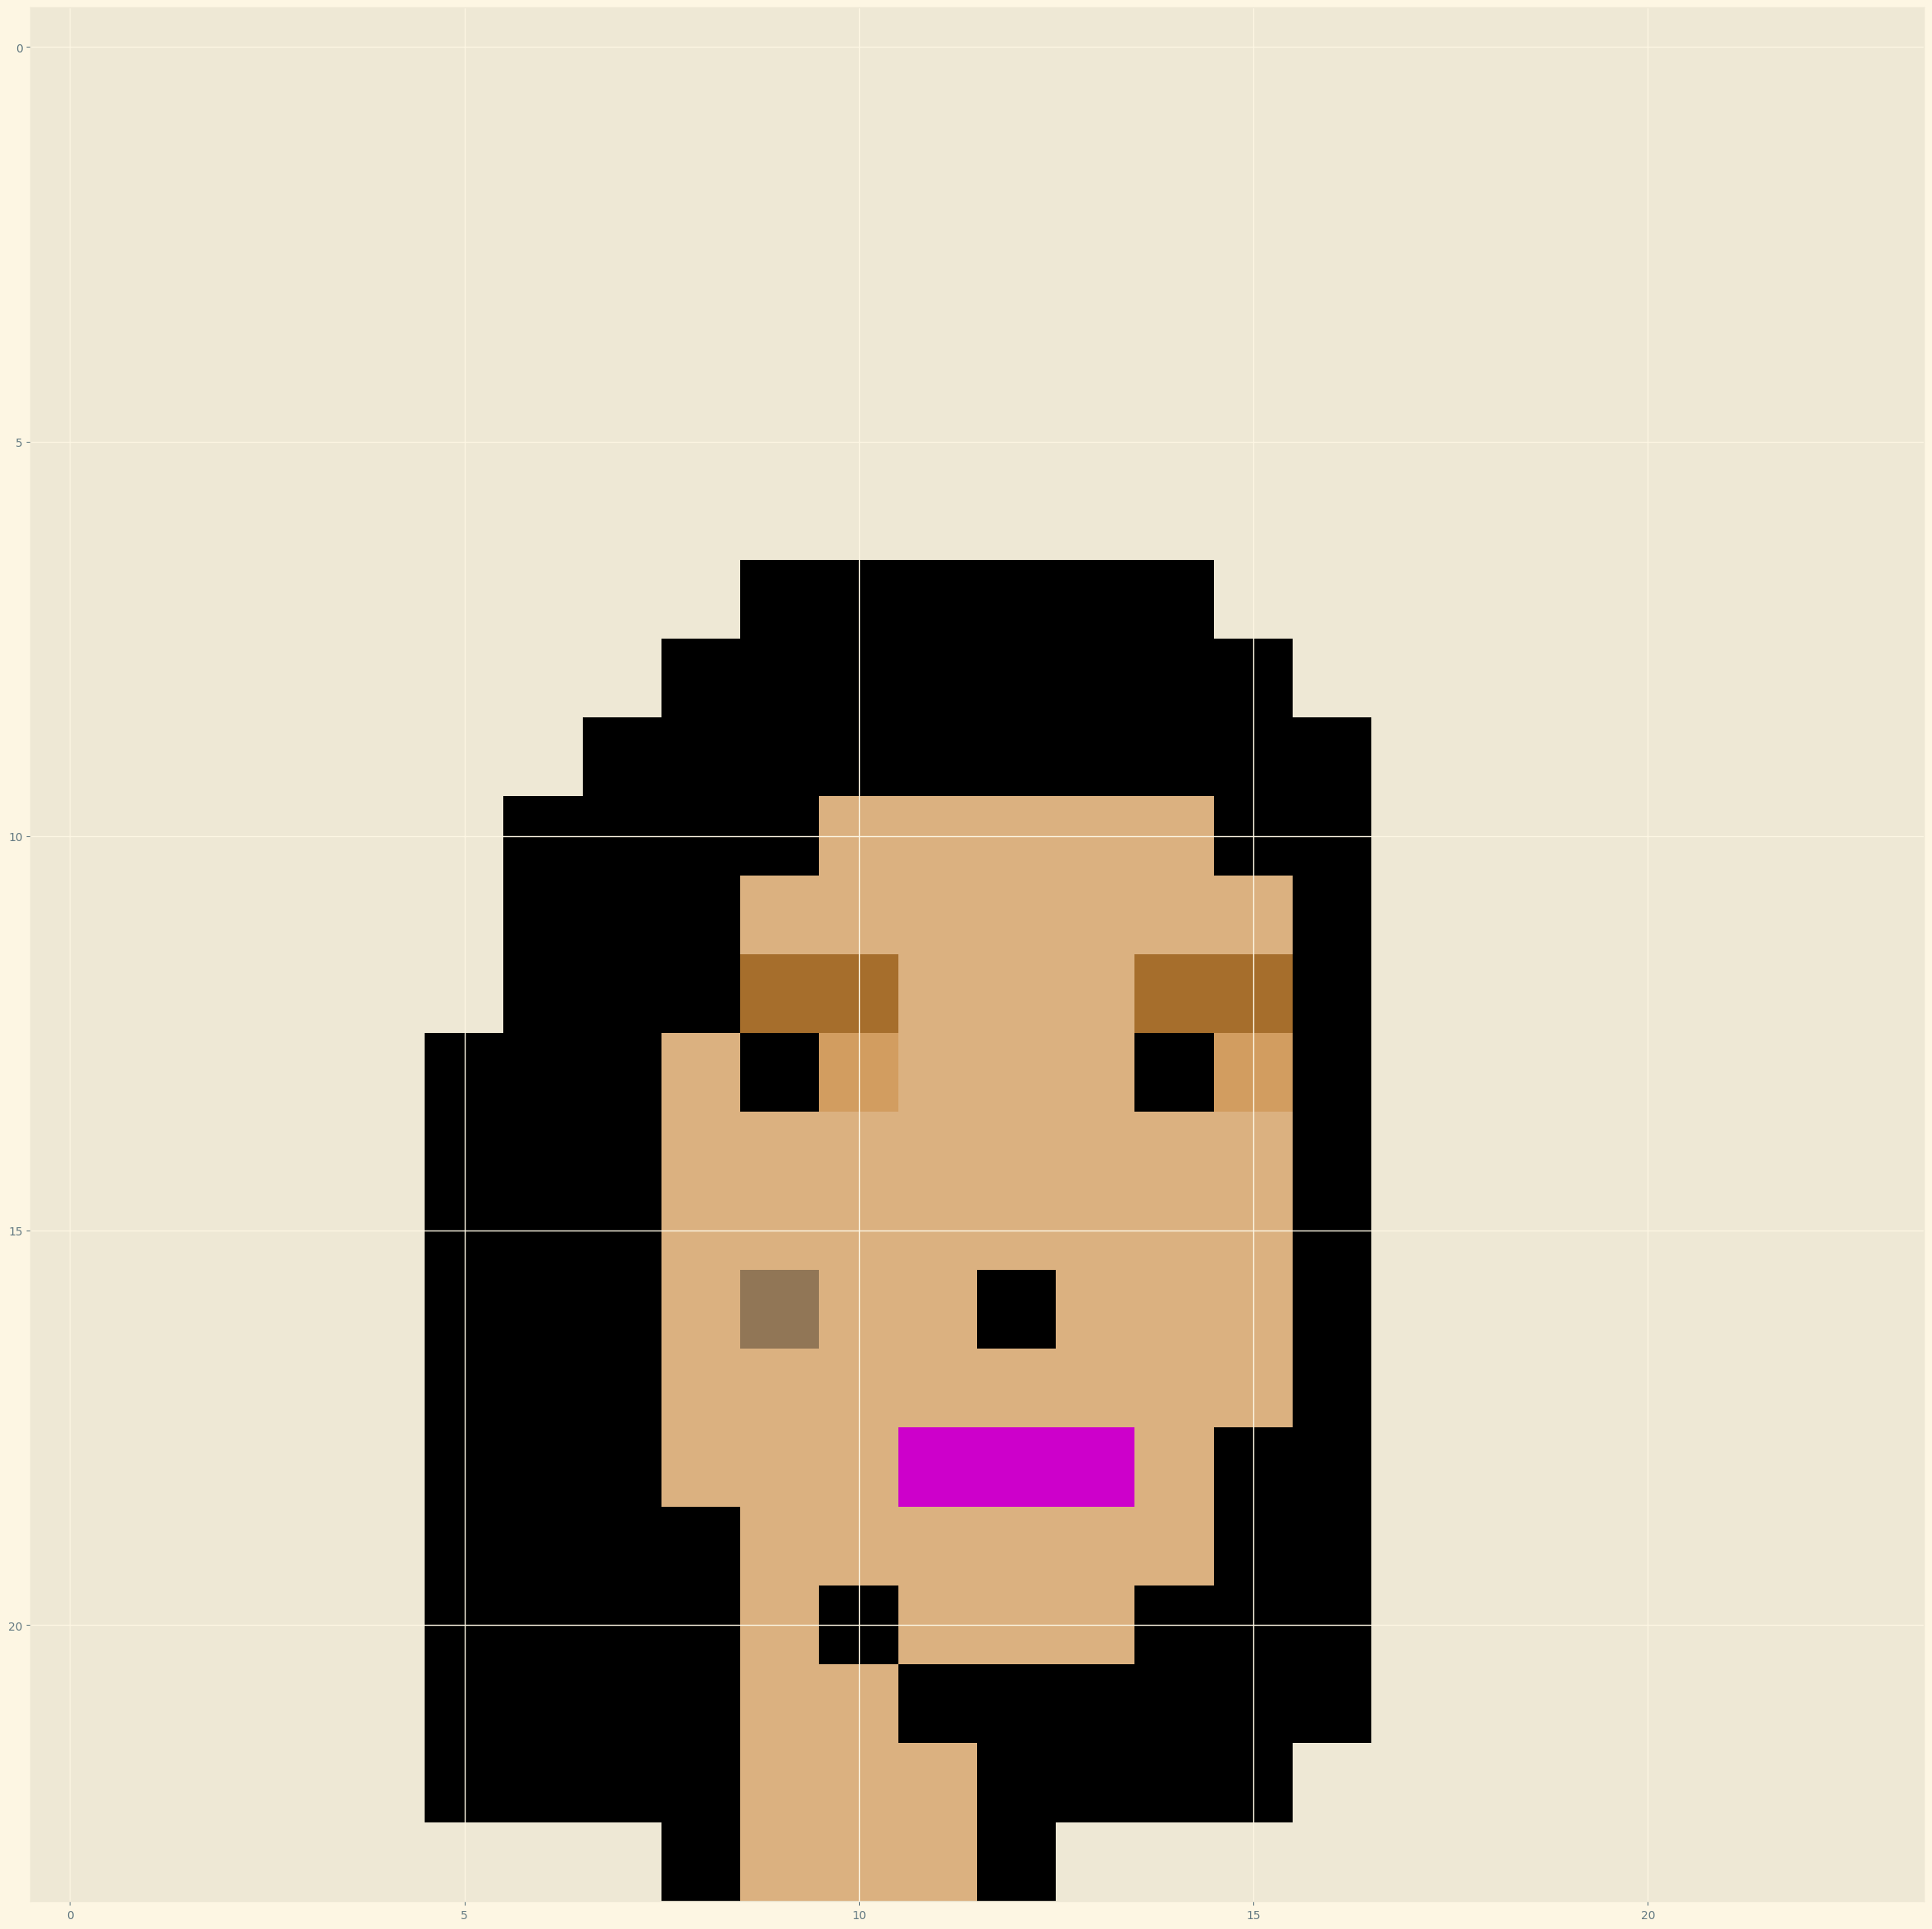

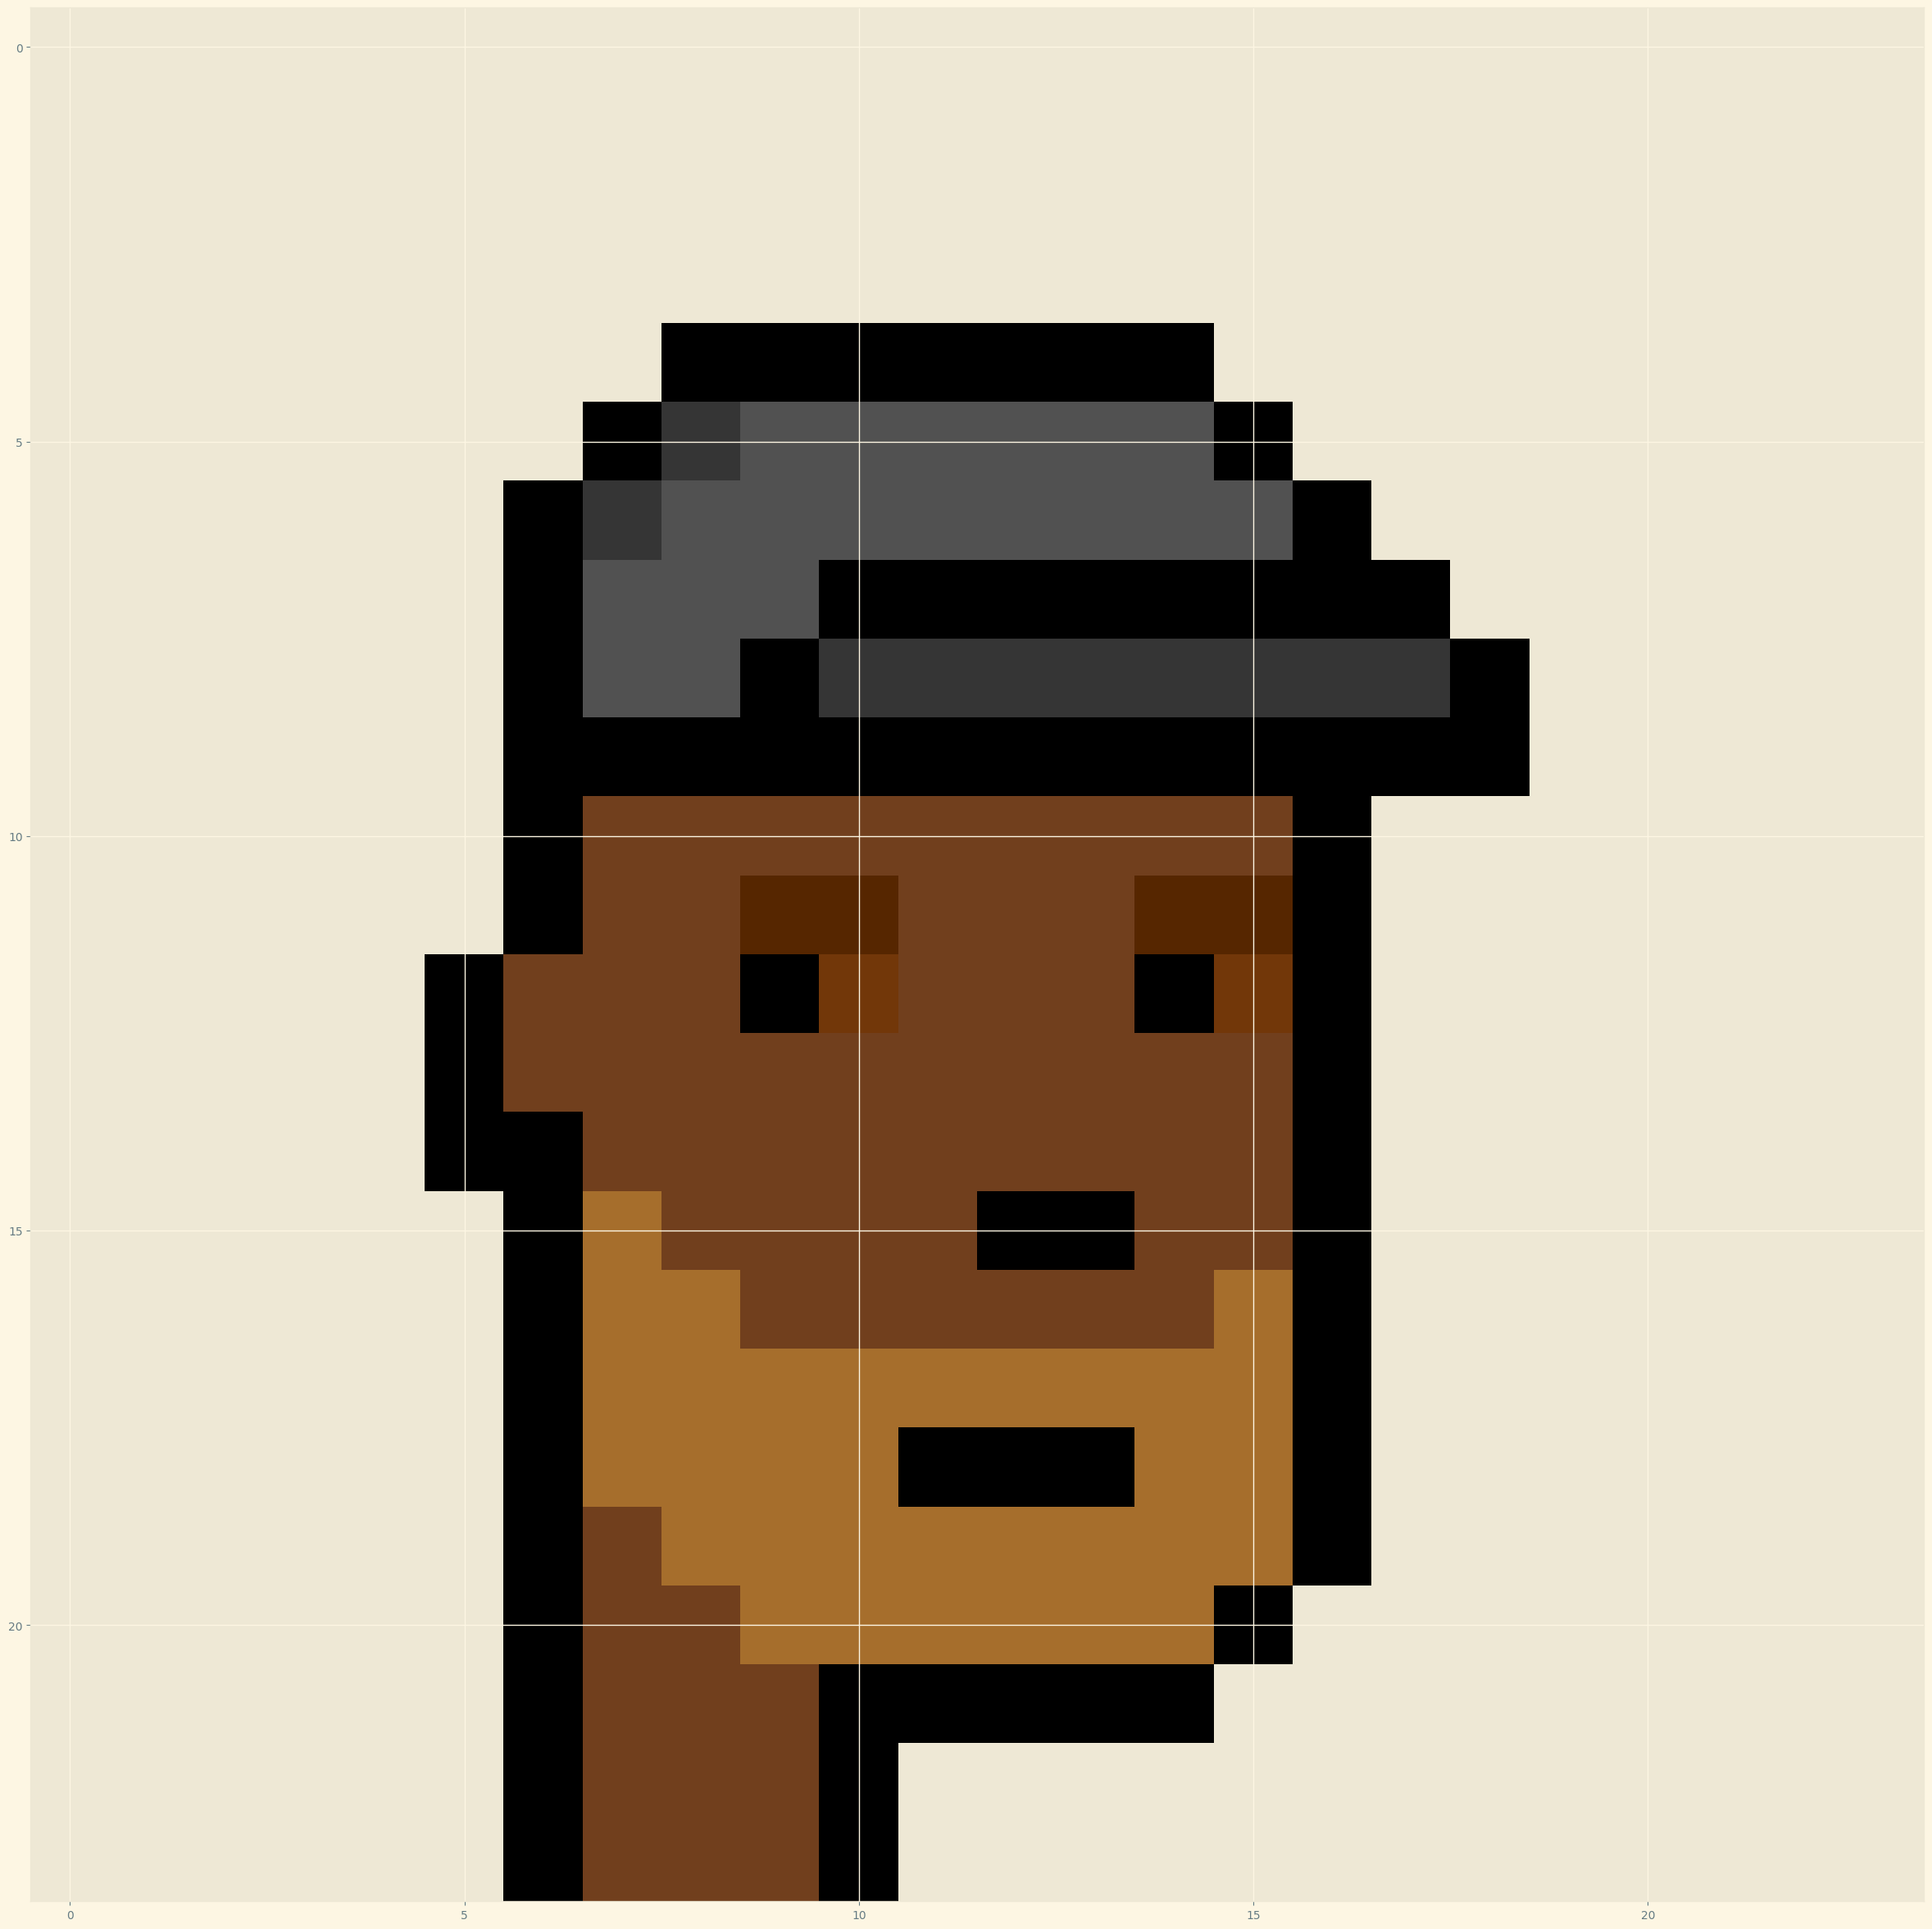

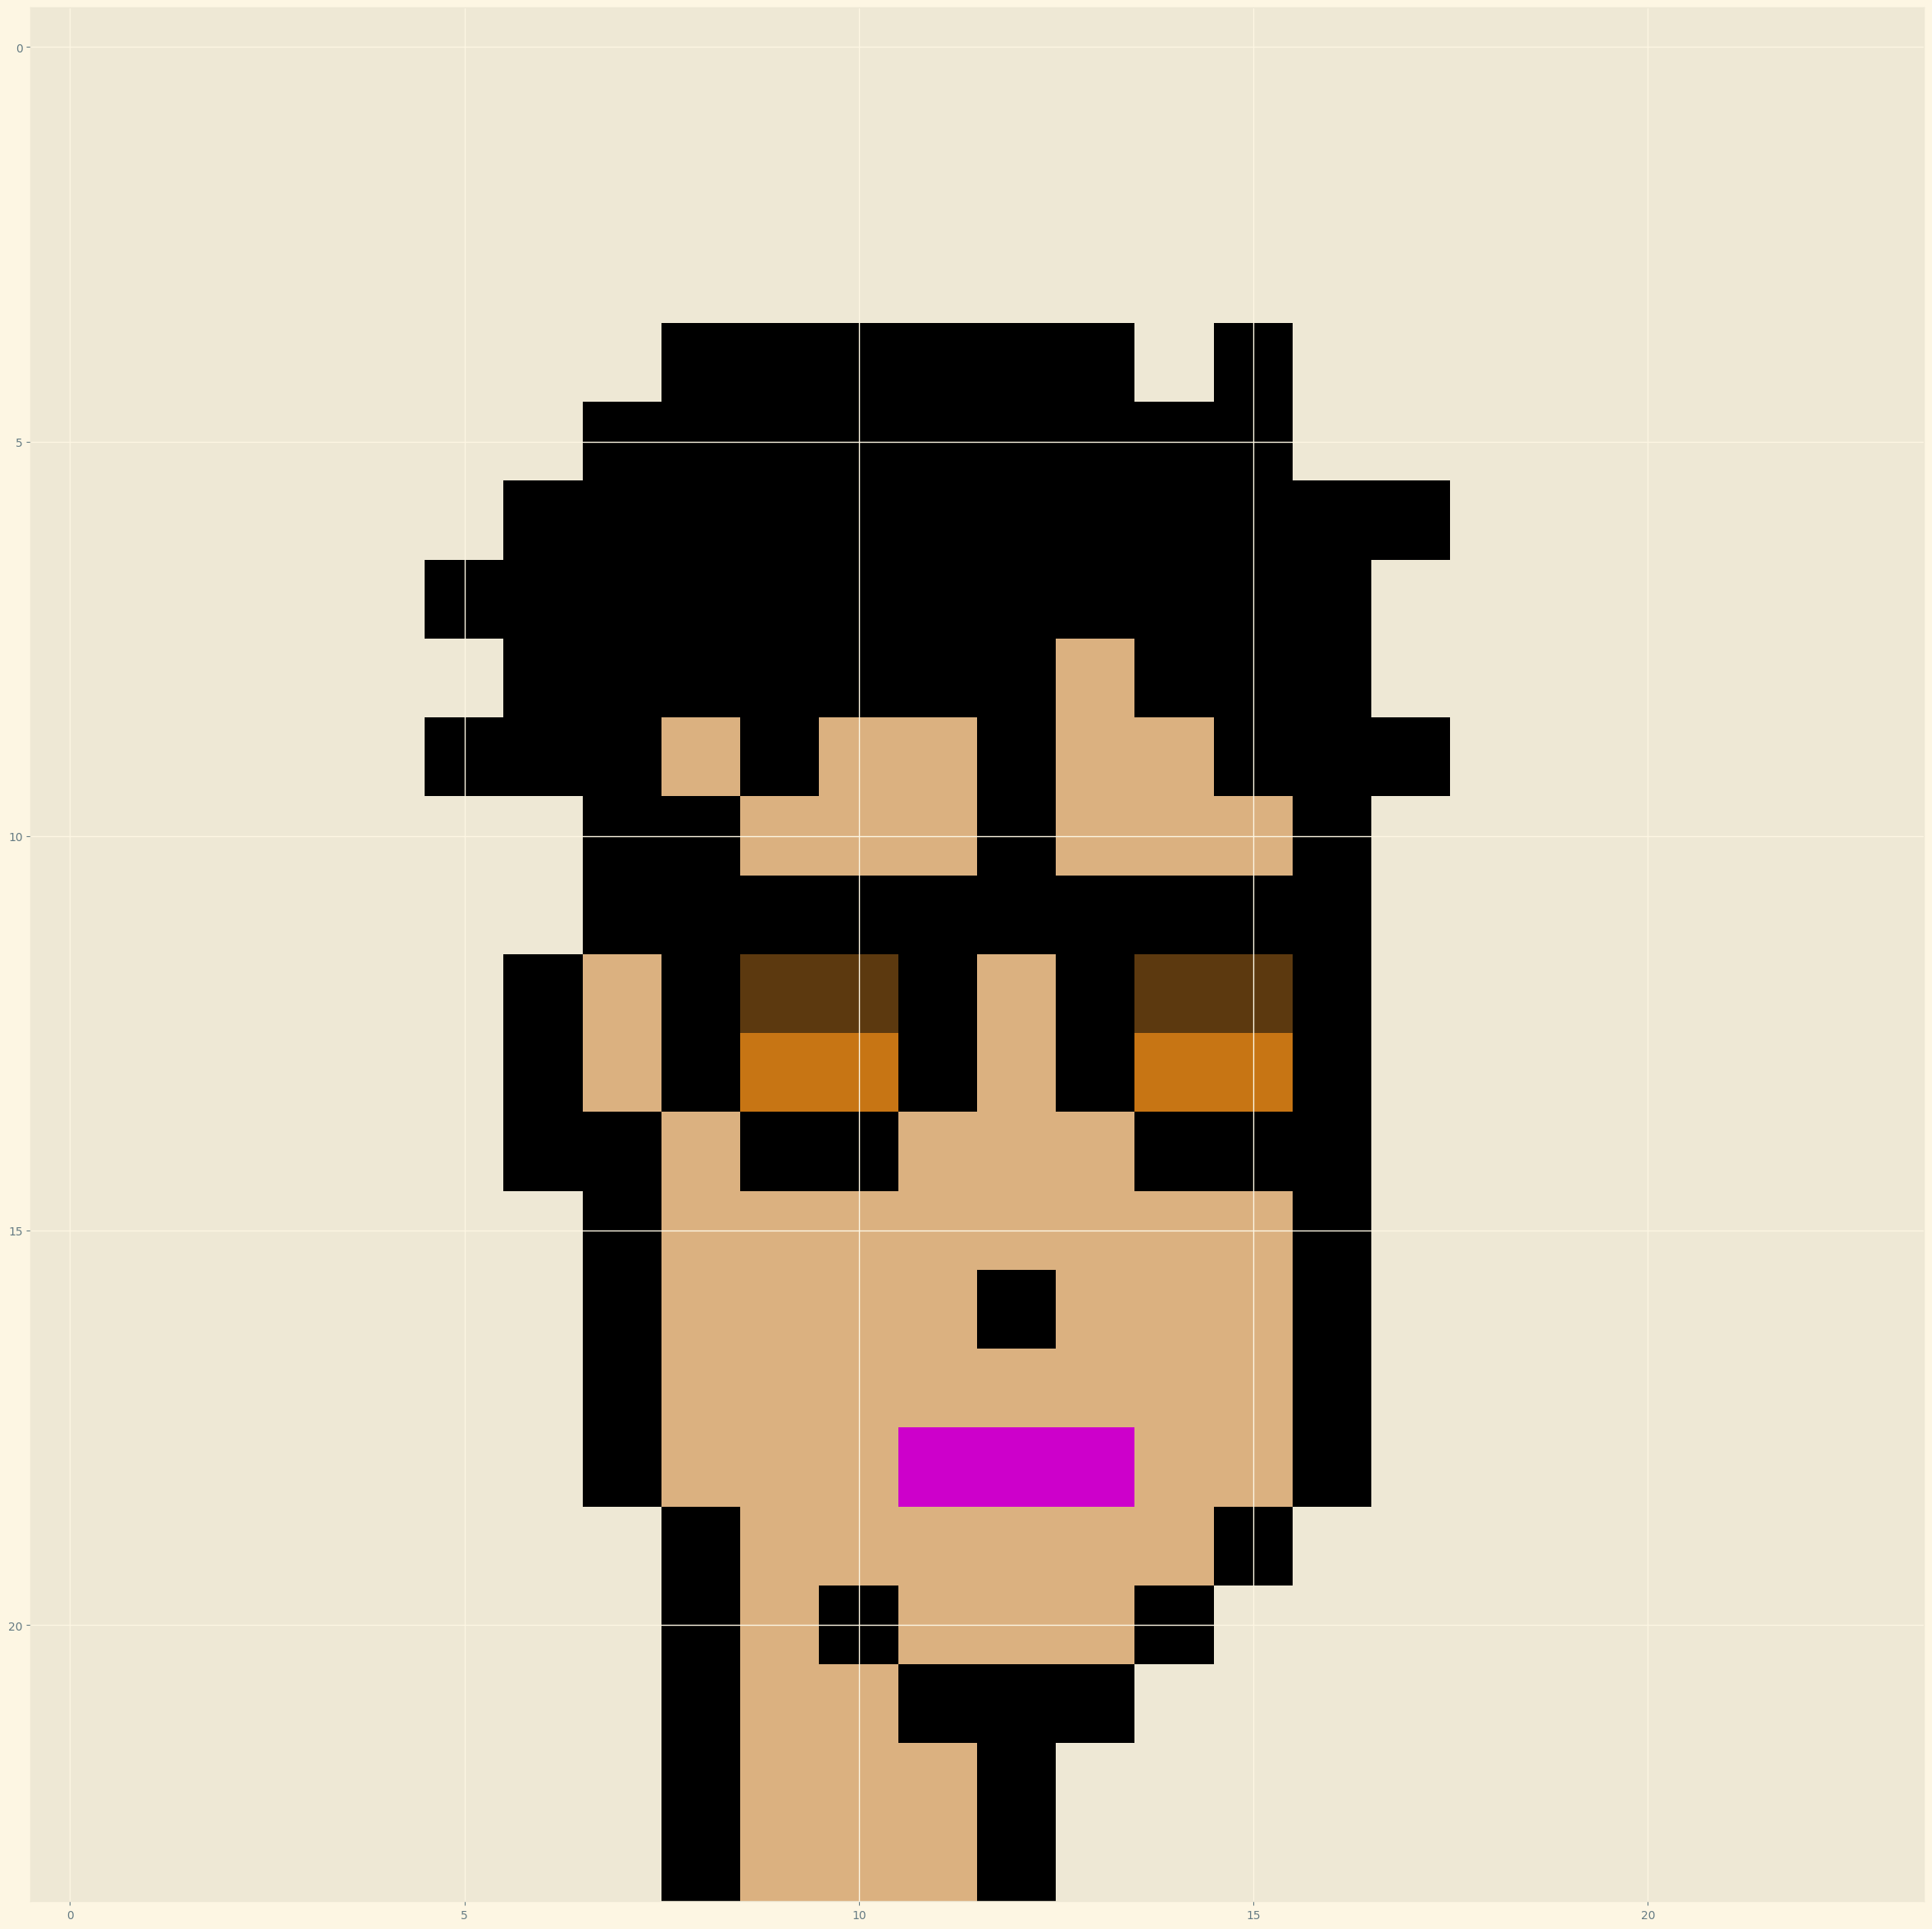

In [25]:
punks = [img for img in glob.glob("/content/imgs/imgs/*.png")]

for punk in punks[0:3]:
    img = plt.imread(punk)
    plt.imshow(img)
    plt.show()

In [26]:
#check data summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167492 entries, 0 to 167491
Data columns (total 12 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   txn_type             167492 non-null  object        
 1   from                 167492 non-null  object        
 2   to                   167492 non-null  object        
 3   date                 167492 non-null  datetime64[ns]
 4   timestamp            167492 non-null  datetime64[ns]
 5   source               167492 non-null  object        
 6   eth                  127542 non-null  float64       
 7   punk_id              167492 non-null  int64         
 8   from_wallet_address  419 non-null     object        
 9   to_wallet_address    419 non-null     object        
 10  type                 167492 non-null  object        
 11  accessories          167492 non-null  object        
dtypes: datetime64[ns](2), float64(1), int64(1), object(8)
memory usage: 15.3

In [27]:
#create new dataframe with only useful columns
df = df[["txn_type", "date", "eth", "punk_id", "type", "accessories"]]
df.head()

,txn_type,date,eth,punk_id,type,accessories
0,Bid Withdrawn,2021-09-04,321.0,0,[Female],"[Green Eye Shadow, Earring, Blonde Bob]"
1,Bid,2021-09-01,321.0,0,[Female],"[Green Eye Shadow, Earring, Blonde Bob]"
2,Bid Withdrawn,2021-09-01,320.0,0,[Female],"[Green Eye Shadow, Earring, Blonde Bob]"
3,Bid,2021-09-01,320.0,0,[Female],"[Green Eye Shadow, Earring, Blonde Bob]"
4,Bid Withdrawn,2021-09-01,263.0,0,[Female],"[Green Eye Shadow, Earring, Blonde Bob]"


In [28]:
#value counts
df['txn_type'].unique()

array(['Bid Withdrawn', 'Bid', 'Sold', 'Offered', 'Transfer', 'Claimed',
       'Offer Withdrawn', '(Wrap)', '(Unwrap)'], dtype=object)

In [29]:
df['accessories'].explode().unique()

array(['Green Eye Shadow', 'Earring', 'Blonde Bob', 'Smile', 'Mohawk',
       'Wild Hair', 'Nerd Glasses', 'Pipe', 'Big Shades', 'Goat',
       'Purple Eye Shadow', 'Half Shaved', 'Do-rag', 'Wild White Hair',
       'Spots', 'Clown Eyes Blue', 'Messy Hair', 'Luxurious Beard',
       'Clown Nose', 'Police Cap', 'Big Beard', 'Blue Eye Shadow',
       'Black Lipstick', 'Clown Eyes Green', 'Straight Hair Dark',
       'Blonde Short', 'Purple Lipstick', 'Straight Hair Blonde',
       'Pilot Helmet', 'Hot Lipstick', 'Regular Shades', 'Stringy Hair',
       'Small Shades', 'Frown', 'Eye Mask', 'Muttonchops', 'Bandana',
       'Horned Rim Glasses', 'Crazy Hair', 'Classic Shades', 'Handlebars',
       'Mohawk Dark', 'Dark Hair', 'Peak Spike', 'Normal Beard Black',
       'Cap', 'VR', 'Frumpy Hair', 'Cigarette', 'Normal Beard',
       'Red Mohawk', 'Shaved Head', 'Chinstrap', 'Mole', 'Knitted Cap',
       'Fedora', 'Shadow Beard', 'Straight Hair', 'Hoodie', 'Eye Patch',
       'Headband', 'Cowbo

In [30]:
len(df['accessories'].explode().unique())

88

In [31]:
#exploded 'type' list to rows of the subset columns
df = df.explode("type")
df.head()

,txn_type,date,eth,punk_id,type,accessories
0,Bid Withdrawn,2021-09-04,321.0,0,Female,"[Green Eye Shadow, Earring, Blonde Bob]"
1,Bid,2021-09-01,321.0,0,Female,"[Green Eye Shadow, Earring, Blonde Bob]"
2,Bid Withdrawn,2021-09-01,320.0,0,Female,"[Green Eye Shadow, Earring, Blonde Bob]"
3,Bid,2021-09-01,320.0,0,Female,"[Green Eye Shadow, Earring, Blonde Bob]"
4,Bid Withdrawn,2021-09-01,263.0,0,Female,"[Green Eye Shadow, Earring, Blonde Bob]"


In [32]:
#visualize
fig = px.bar(df[df.txn_type == 'Sold'].groupby("type").agg({"eth": "max"}).sort_values(by="eth").reset_index('type'),
             x="type", 
             y="eth", 
             color="type", 
             title="CryptoPunk Types vs. Price")
fig.show()

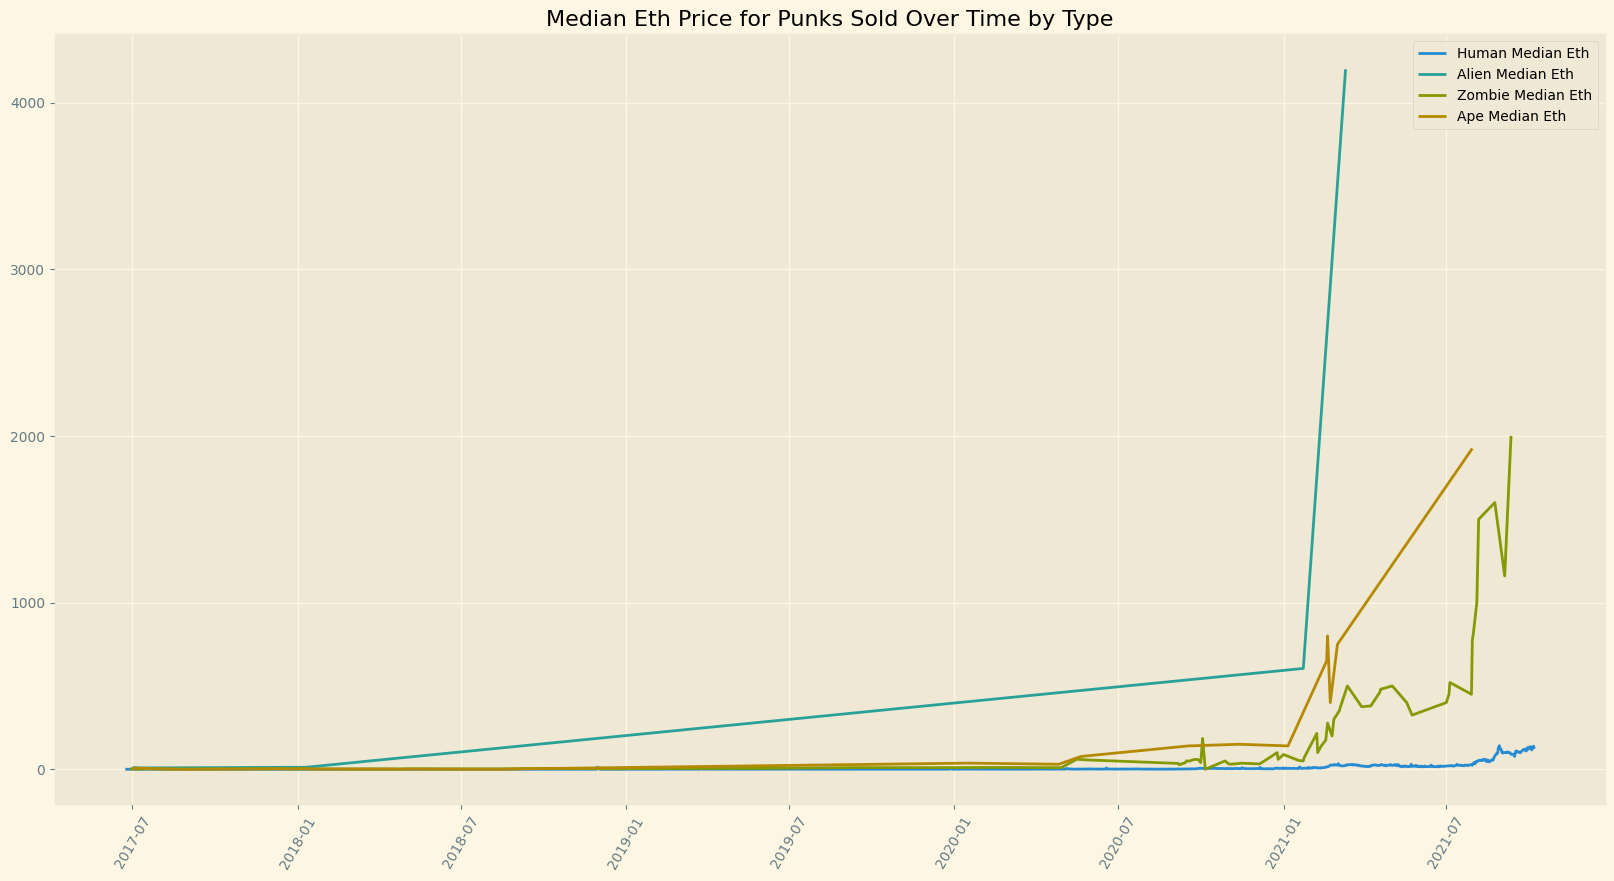

In [33]:
#visualize human
human = df[(df.txn_type == 'Sold') & ((df.type == "Female") | (df.type == "Male")) ].groupby("date").agg({"eth": ["median"]}).reset_index("date")

#visualize alien
alien = df[(df.txn_type == 'Sold') & ((df.type == "Alien")) ].groupby("date").agg({"eth": ["median"]}).reset_index("date")

#visualize zombie
zombie = df[(df.txn_type == 'Sold') & ((df.type == "Zombie")) ].groupby("date").agg({"eth": ["median"]}).reset_index("date")

#visualize ape
ape = df[(df.txn_type == 'Sold') & ((df.type == "Ape")) ].groupby("date").agg({"eth": ["median"]}).reset_index("date")

plt.figure(figsize=(20,10))
plt.plot(human['date'], 
         human['eth']['median'], 
         label="Human Median Eth")

plt.plot(alien['date'], 
         alien['eth']['median'], 
         label="Alien Median Eth")

plt.plot(zombie['date'], 
         zombie['eth']['median'], 
         label="Zombie Median Eth")

plt.plot(ape['date'], 
         ape['eth']['median'], 
         label="Ape Median Eth")

plt.legend()
plt.xticks(rotation=60)
plt.title("Median Eth Price for Punks Sold Over Time by Type")
plt.show()

In [34]:
#get number of attributes
df['num_attributes'] = df.accessories.apply(lambda x: len(x))

In [35]:
#compare number of attributes vs. price
fig = px.bar(df[(df.txn_type == "Sold") & ((df.type == "Female") | (df.type == "Male"))].groupby("num_attributes").agg({"eth": "mean"}).reset_index("num_attributes"),
             x="num_attributes", 
             y="eth", 
             color="eth", 
             title="CryptoPunk Price per Number of Attributes of Human Punks")
fig.show()

In [36]:
#visualize number of attributes vs price for alien
fig = px.bar(df[(df.txn_type == "Sold") & ((df.type == "Alien"))].groupby("num_attributes").agg({"eth": "mean"}).reset_index("num_attributes"),
             x="num_attributes", 
             y="eth", 
             color="eth", 
             title="CryptoPunk Price per Number of Attributes of Alien Punks")
fig.show()

In [37]:
#visualize number of attributes vs price for zombie
fig = px.bar(df[(df.txn_type == "Sold") & ((df.type == "Zombie"))].groupby("num_attributes").agg({"eth": "mean"}).reset_index("num_attributes"),
             x="num_attributes", 
             y="eth", 
             color="eth", 
             title="CryptoPunk Price per Number of Attributes of Zombie Punks")
fig.show()

In [38]:
#visualize number of attributes vs price for ape
fig = px.bar(df[(df.txn_type == "Sold") & ((df.type == "Ape"))].groupby("num_attributes").agg({"eth": "mean"}).reset_index("num_attributes"),
             x="num_attributes", 
             y="eth", 
             color="eth", 
             title="CryptoPunk Price per Number of Attributes of Ape Punks")
fig.show()

# DataLoader & Preprocessing

In [39]:
#display tensor image
def tensor_imshow(img, dnorm=True):
    img = img.to('cpu')
    npimg = img.detach().numpy()
    if dnorm:
        npimg = npimg*0.5+0.5
    plt.figure(figsize=(3, 3))
    plt.axis('off')
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

In [40]:
def get_dataloader(batch_size,           #batch size during training
                   image_size,           #spatial size of training images
                   data_dir=image_dir,   #root directory for dataset
                   num_workers=3):       #number of sub-processes
    
    stats = (0.5, 0.5, 0.5), (0.5, 0.5, 0.5) 
    
    #create transformer to transform images
    transform = transforms.Compose([transforms.Resize((image_size, image_size)),  #resize
                                    transforms.ToTensor(),                        #convert to tensor
                                    transforms.Normalize(*stats)])                #normalize to be between -1 and 1
    
    #create the dataset
    dataset = datasets.ImageFolder(root=data_dir,
                                   transform=transform)
    
    #create the dataloader
    data_loader = torch.utils.data.DataLoader(dataset,
                                              batch_size=batch_size,
                                              shuffle=True,
                                              num_workers=num_workers,
                                              pin_memory=True)
    
    return data_loader

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning:

This DataLoader will create 3 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.



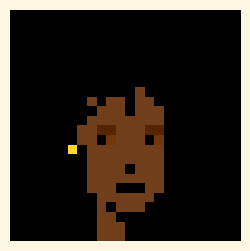

In [41]:
#test dataloader
batch_size, image_size = 5, 24

train_loader = get_dataloader(batch_size,
                              image_size,
                              image_root)

dataiter = iter(train_loader) #dataloader is an iterator

img,_ = next(dataiter)
sample_img = img[-1]

#display tensor image
tensor_imshow(sample_img)

In [59]:
#custom weights initialization to randomly initialize all weights
#mean=0, stdev=0.2
def weights_init_normal(m):
    
    if isinstance(m, nn.Conv2d) or isinstance(m, nn.ConvTranspose2d):
        torch.nn.init.normal_(m.weight, 0.0, 0.02) 
        
    if isinstance(m, nn.BatchNorm2d):
        torch.nn.init.normal_(m.weight, 0.0, 0.02)
        torch.nn.init.constant_(m.bias, 0)

# Training Procedure

**Part 1 - Train the discriminator**

* Generate fixed_z to get a fixed batch of latent vectors which we will use to keep track of the generator learning progression.
* Train the discriminator with all-real batches of images: forward pass, calculate d_real_loss with real_loss() and calculate the gradients in a backward pass gradients in a backward pass with backward().
* Use the generator to generate all-fake batches of images and use that to train the discriminator: forward pass, calculate d_fake_loss with fake_loss() and and calculate the gradients in a backward pass with backward()
* Total d_loss with be the sum of d_real_loss and d_fake_loss.
* Update d_optimizer with step().

**Part 2 - Train the generator**

* Use discriminator to classify generator's output g_out.
* Computes generator's loss using real_loss().
* Computes generator's gradients in a backward pass with backward().
* Updates generator's optimizer with step().

For every mini-batch of data, we train the discriminator for one iteration, and then the generator for one iteration.

In [61]:
def print_tensor_images(images_tensor):
    
    '''
    Function for visualizing images: Given a tensor of images, prints the images.
    '''
        
    plt.rcParams['figure.figsize'] = (15, 15)
    plt.subplots_adjust(wspace=0, hspace=0)
    
    images_tensor = images_tensor.to('cpu')
    npimgs = images_tensor.detach().numpy()
    
    no_plots = len(images_tensor)

    for idx,image in enumerate(npimgs):
        plt.subplot(1, 8, idx+1)
        plt.axis('off')
        #dnorm
        image = image * 0.5 + 0.5
        plt.imshow(np.transpose(image, (1, 2, 0)))
        
    plt.show()

In [62]:
def train(D, G, 
          n_epochs,
          dataloader,
          d_optimizer,
          g_optimizer,
          z_dim,
          print_every=50,
          device='cpu'):
    
    #to keep track of the generator’s learning progression, 
    #we will generate a fixed batch of latent vectors that are drawn from a Gaussian distribution   
    sample_size=8
    fixed_z = Generator.get_noise(n_samples=sample_size,
                                  z_dim=z_dim,
                                  device=device)
    
    for epoch in range(1,n_epochs+1):
        #use dataloader to fetch batches
        for batch_i,(real_images,_) in enumerate(dataloader):
            batch_size = real_images.size(0)
            real_images = real_images.to(device)
            
            #Part 1: Train the Discriminator ========================================================
            #goal: to maximize the probability of correctly classifying a given input as real or fake
            
            #zero out the gradients before backpropagation
            d_optimizer.zero_grad()
            
            ##classify all-real batch
            d_real_op = D(real_images) #average output (across the batch) of the discriminator
            d_real_loss = real_loss(d_real_op,
                                    device=device)
            
            #train with all-fake batch
            noise = Generator.get_noise(n_samples=batch_size,
                                        z_dim=z_dim,
                                        device=device)
            fake_images = G(noise)
            
            #classify all-fake batch
            d_fake_op = D(fake_images) #average output (across the batch) of the generator
            d_fake_loss = fake_loss(d_fake_op,
                                    device=device)
            
            #total loss
            d_loss = d_real_loss + d_fake_loss
            
            #update gradients
            d_loss.backward()
            #update optimizer
            d_optimizer.step()
            
            #Part 2: Train the Generator ==============================================================
            #zero out the gradients before backpropagation
            g_optimizer.zero_grad()
            noise = Generator.get_noise(n_samples=batch_size,
                                        z_dim=z_dim,
                                        device=device)
            
            #use discriminator to classify generator's output
            g_out = G(noise)
            d_out = D(g_out)
            
            g_loss = real_loss(d_out, 
                               device=device) 
            #update gradients
            g_loss.backward()
            #update optimizer
            g_optimizer.step()
        
        print('Epoch [{:5d}/{:5d}] | d_loss: {:6.4f} | g_loss: {:6.4f}'.format(epoch, 
                                                                               n_epochs, 
                                                                               d_loss.item(),  #keep track of loss
                                                                               g_loss.item())) #keep track of loss
        if (epoch % print_every == 0):
            G.eval()
            sample_image = G(fixed_z)
            print_tensor_images(sample_image)
            G.train()

## Train Time!

In [63]:
#hyperparameters
device = "cuda" if torch.cuda.is_available() else "cpu"
print("Device is ", device)

#incorrect hyperparameter settings lead to mode collapse
#we will follow Goodfellow’s paper
z_dim = 100       #noise
beta_1 = 0.5      #as specified in the original DCGAN paper
beta_2 = 0.999 
lr = 0.0002       #as specified in the original DCGAN paper
n_epochs = 100
batch_size = 128
image_size = 64

Device is  cpu


In [64]:
#initialize generator
generator = Generator(z_dim, 
                      im_chan=3, 
                      hidden_dim=64).to(device)

#initialize discriminator
discriminator = Discriminator(im_chan=3, 
                              conv_dim=64, 
                              image_size=image_size).to(device)

#setup Adam optimizers for generator
g_optimizer = optim.Adam(generator.parameters(), 
                         lr=lr, 
                         betas=(beta_1, beta_2))

#setup Adam optimizers for discriminator
d_optimizer = optim.Adam(discriminator.parameters(), 
                         lr=lr, 
                         betas=(beta_1, beta_2))

#setup dataloader
dataloader = get_dataloader(batch_size, 
                            image_size, 
                            image_root)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning:

This DataLoader will create 3 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.



In [65]:
#start training
%time
n_epochs = 100
train(discriminator,
      generator,
      n_epochs,
      dataloader,
      d_optimizer,
      g_optimizer,
      z_dim,
      print_every=10,
      device=device)

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 5.96 µs


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning:

This DataLoader will create 3 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.



KeyboardInterrupt: ignored

In [ ]:
plt.figure(figsize = (15, 8))
plt.plot(noise)
plt.title("Noise")
plt.show()

In [ ]:
def save_model(generator,file_name):
    generator = generator.to('cuda')
    torch.save(generator.state_dict(),"cryptopunks_generator.pth")

save_model(generator,"kaggle")

# Create New CryptoPunks

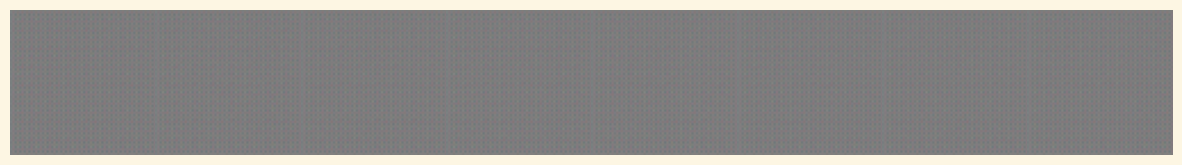

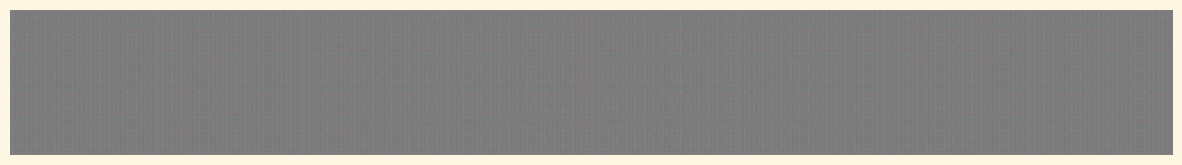

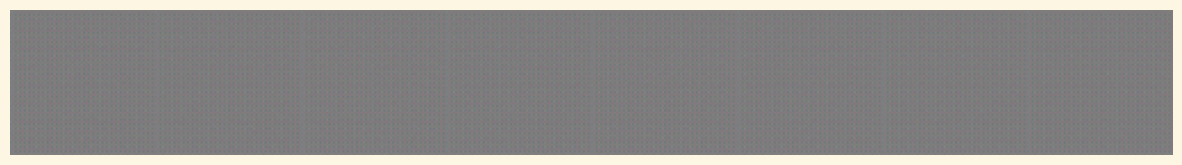

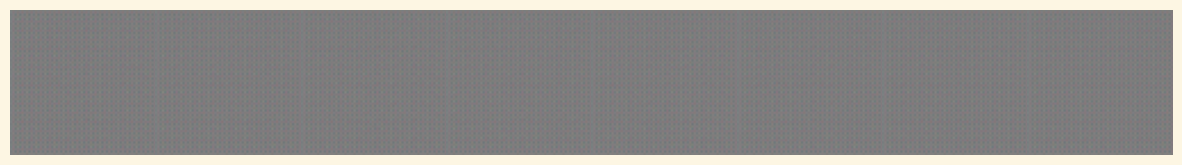

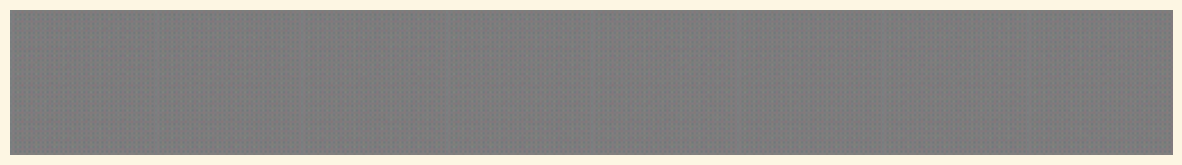

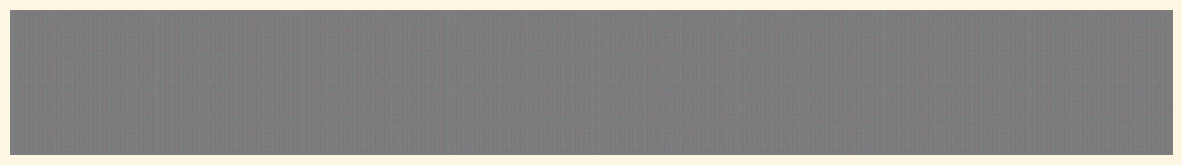

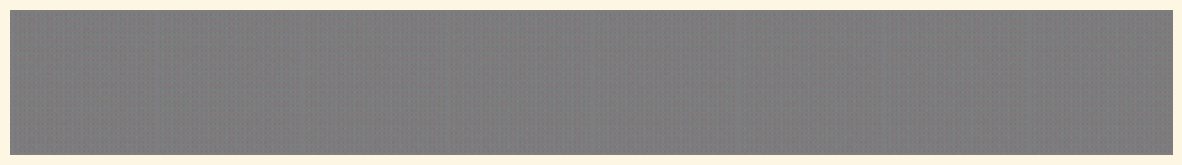

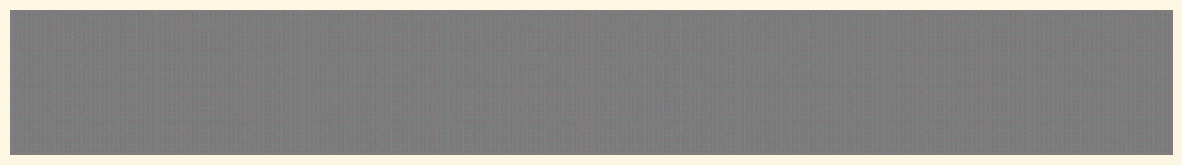

In [60]:
#sample generation
generator.to(device)
generator.eval()       #eval mode
sample_size=8

for i in range(8):    
    
    #generate latent vectors
    fixed_z = Generator.get_noise(n_samples=sample_size, 
                                  z_dim=z_dim, 
                                  device=device)    
    
    #generate samples
    sample_image = generator(fixed_z)
    
    #display samples
    print_tensor_images(sample_image)